# Building Code Based Record Selection
Created on: 26/08/2021

Updated on: 20/05/2022

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

In [1]:
from EzGM.selection import code_spectrum
from EzGM.utility import run_time
from time import time
import os

In [2]:
# Acquire the run start time
start_time = time()

# Path to user-defined target spectrum
parent_path = os.path.dirname(os.path.realpath(""))
target_path = os.path.join(parent_path,'input files','Target_Spectrum.txt')

# if target_path=none, target spectrum is generated based on site parameters, and specified code
# Comment the next line if you want to use the user-defined spectrum.
target_path=None 

## 1) Initialize the code_spectrum object for record selection

In [3]:
# Set the record selection settings at this stage
spec = code_spectrum(database='NGA_W2', outdir='Outputs', target_path=target_path, nGM=11, selection=2,
            Mw_lim=[6.5, 8], Vs30_lim=[200, 700], Rjb_lim=[0, 20], fault_lim=None, opt=1, 
            maxScale=2.5, RecPerEvent=3)

## 2) Select the ground motions 
### 2a) According to TBEC 2018 (Turkish Building Earthquake Code)

TBEC 2018 based ground motion record selection and amplitude scaling are finished...


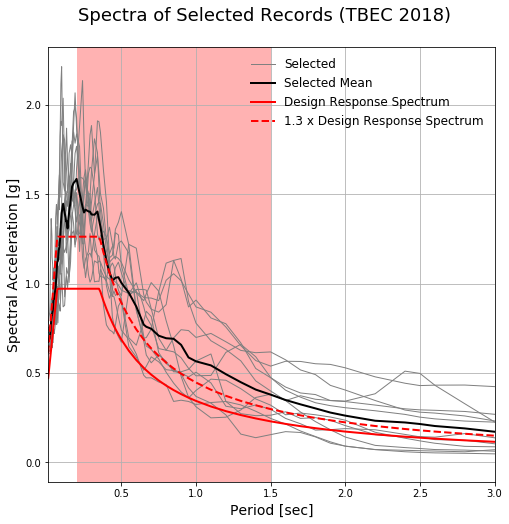

In [4]:
spec.tbec2018(Lat=41.0582, Long=29.00951, DD=2, SiteClass='ZC', Tp=1)

# selected records can be plotted at this stage
spec.plot(save=1, show=1)

### 2b) According to ASCE 7-16 (Minimum Design Loads and Associated Criteria for Buildings and Other Structures, 2016)

ASCE 7-16 based ground motion record selection and amplitude scaling are finished...


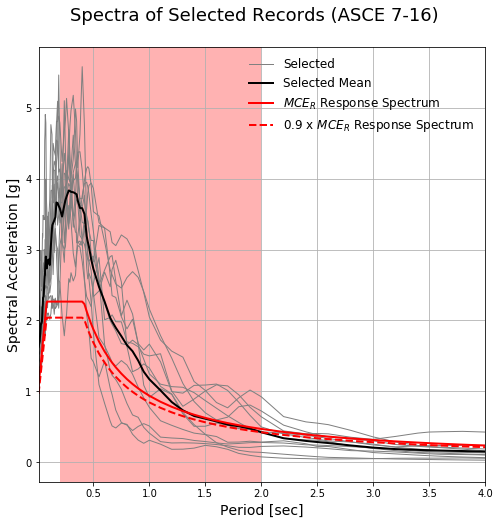

In [5]:
spec.asce7_16(Lat=34, Long=-118, RiskCat='II', SiteClass='C', T1_small=1, T1_big=1, Tlower = None, Tupper = None)

# selected records can be plotted at this stage
spec.plot(save=1, show=1)

### 2c) According to EC8 Part 1 (Eurocode 8 Part 1)

EC8 - Part 1 based ground motion record selection and amplitude scaling are finished...


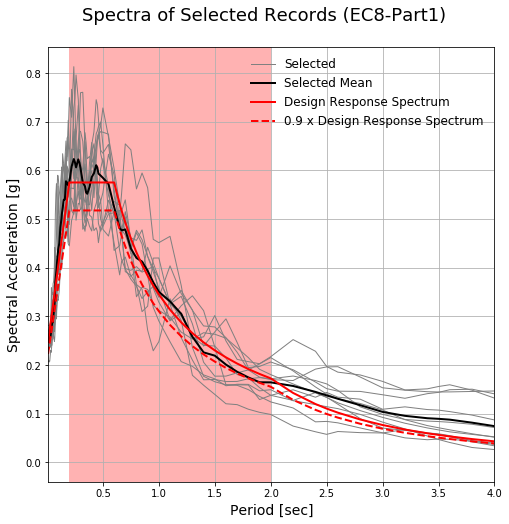

In [6]:
spec.ec8_part1(ag=0.2, xi=0.05, ImpClass='II', Type='Type1', SiteClass='C', Tp=1)
# selected records can be plotted at this stage
spec.plot(save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [7]:
# You should enter correct credentials to download the records
spec.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 2, browser = 'firefox')


Started executing ngaw2_download method...
Getting the webdriver to use...
Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finish

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [8]:
spec.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
/home/volkan/Desktop/EzGM/Examples/binder/Outputs


In [9]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 0 minutes: 55.47 seconds
